
<h1><center>Linear Regression</center></h1>




<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding_data">Understanding the Data</a></li>
        <li><a href="#reading_data">Reading the data in</a></li>
        <li><a href="#data_exploration">Data Exploration</a></li>
        <li><a href="#Linear_regression">Linear Regression Model</a></li>
    </ol>
</div>
<br>
<hr>

### Importing Needed packages

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<h2 id="understanding_data">Understanding the Data</h2>

We have downloaded student learning data, which contains No of Hours a student spends studying and corresponding score obtained by the student. [Dataset source](http://bit.ly/w-data)

- **Hours** e.g. 5 hrs
- **Score** e.g. 70 marks

<h2 id="reading_data">Reading the data in</h2>

In [61]:
path = "http://bit.ly/w-data"
df= pd.read_csv(path)
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<h2 id="data_exploration">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

In [62]:
# summarize the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [63]:
df.shape

(25, 2)

Text(0, 0.5, 'Score obtained')

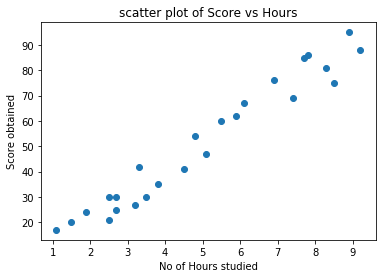

In [64]:
x=df.Hours
y=df.Scores
plt.scatter(x,y)
plt.title("scatter plot of Score vs Hours")
plt.xlabel("No of Hours studied")
plt.ylabel("Score obtained")

In [65]:
x= df.iloc[:, :-1].values
y= df.iloc[:, 1].values

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 70% of the entire data for training, and the 30% for testing. 

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=0)

<h2 id="Linear_regression">Linear Regression Model</h2>

#### Modeling
Using sklearn package to model data.

In [67]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Plot outputs

we can plot the fit line over the data:

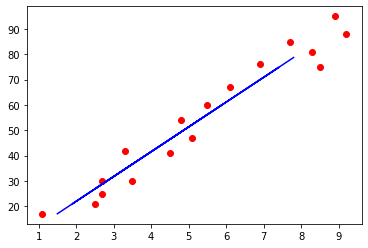

In [68]:
plt.scatter(x_train,y_train, color= "red")
plt.plot(x_test, pred, color= "blue")

Text(0, 0.5, 'Y_Prediction')

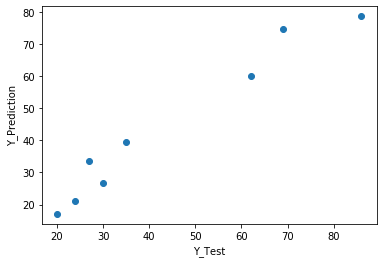

In [69]:
plt.scatter(y_test, pred)
plt.xlabel("Y_Test")
plt.ylabel("Y_Prediction")

In [70]:
dt=pd.DataFrame({'Actual': y_test, 'Predicted': pred})
dt

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [71]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)
print("Mean squared error:",mean_squared_error(y_test, pred))
print("R-squared:",regr.score(x,y))

Mean squared error: 22.96509721270043
R-squared: 0.9529426789332803


<h2 id="Linear_regression">Now let's predict the score of the student who has studied for 9.25 hours </h2>

In [72]:
Prediction_score=regr.predict([[9.25]])
print("The student who has studied for 9.25 hours will get:", Prediction_score,"marks")

The student who has studied for 9.25 hours will get: [92.91505723] marks
